<a href="https://colab.research.google.com/github/yanrpi/bmed-4460-6460/blob/master/01_PythonBasics/03_numpy_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

(634, 800)
uint8
6
137
20.532529574132493


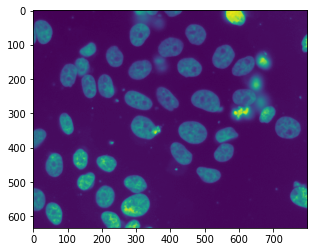

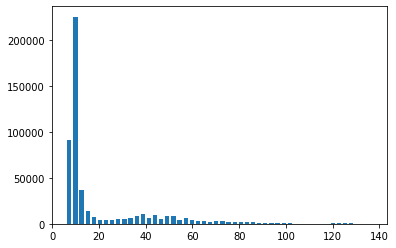

In [5]:
fName = "GFP_06-DAPI.tif"

I = imageio.imread(fName, format='tif')
print(I.shape)
print(I.dtype)
print(I.min())
print(I.max())
print(I.mean())

plt.imshow(I)
plt.show()      # show the window
hist, bins = np.histogram(I, bins=50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

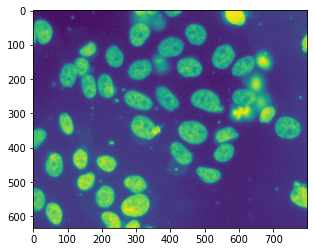

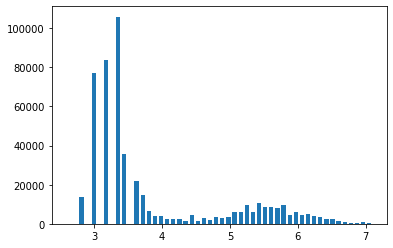

In [6]:
'''Map the intensity in the log2 '''
ILog = np.log2(I, dtype=np.float32)
plt.imshow(ILog)
plt.show()      # show the window
hist, bins = np.histogram(ILog, bins=50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


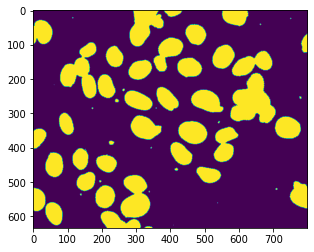

In [17]:
'''Global Threshold'''
idx = I > 20
plt.imshow(idx)
plt.show()

# 1. Choose a threshold 
#
#idx = ILog > ???

# 2. Choose a colormap
# https://matplotlib.org/tutorials/colors/colormaps.html
#
#plt.imshow(idx, cmap='?????') 
#plt.show()

In [ ]:
'''Report Area and Intensity in Segmentation Mask'''
nPixels    = len(I[idx])
PercentArea =  100.0 * float(nPixels) / float(I.size) 
print("Number of Pixels in Mask: ", nPixels)         #131296
print("Percent Area: ",             PercentArea)     #25.88

print("Mean Intensity in Mask: ", I[idx].mean())     #50.782
print("Max Intensity in Mask: ",  I[idx].max())      #137
print("Min Intensity in Mask: ",  I[idx].min())      #21

Number of Pixels in Mask:  126978
Percent Area:  25.035094637223974
Mean Intensity in Mask:  51.77928460048197
Max Intensity in Mask:  137
Min Intensity in Mask:  23


Number of elements:  61


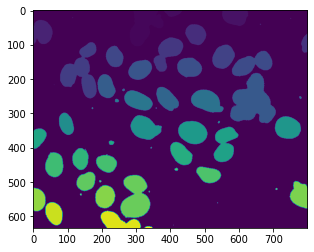

In [10]:
from scipy.ndimage import measurements
ILabel, nFeatures = measurements.label(idx)
print("Number of elements: ", nFeatures)
plt.imshow(ILabel)
plt.show()

In [11]:
'''Report Intensity Per Object'''
for k in range(nFeatures):
    idxCell = ILabel == k
    print("Cell: ", k, " Mean: ", I[idxCell].mean())

Cell:  0  Mean:  9.966823976334384
Cell:  1  Mean:  41.96336499321574
Cell:  2  Mean:  38.03718459495352
Cell:  3  Mean:  90.97310513447432
Cell:  4  Mean:  23.75
Cell:  5  Mean:  26.5
Cell:  6  Mean:  49.81197900586601
Cell:  7  Mean:  28.181818181818183
Cell:  8  Mean:  37.28561202576951
Cell:  9  Mean:  71.76076555023923
Cell:  10  Mean:  33.653238033354995
Cell:  11  Mean:  45.88764705882353
Cell:  12  Mean:  39.870435806831566
Cell:  13  Mean:  37.49408783783784
Cell:  14  Mean:  46.17680986475736
Cell:  15  Mean:  43.12593984962406
Cell:  16  Mean:  38.79598662207358
Cell:  17  Mean:  51.77351858051557
Cell:  18  Mean:  45.473723443906074
Cell:  19  Mean:  21.0
Cell:  20  Mean:  35.873162393162396
Cell:  21  Mean:  21.0
Cell:  22  Mean:  30.05128205128205
Cell:  23  Mean:  42.519668737060044
Cell:  24  Mean:  46.24454409566517
Cell:  25  Mean:  34.69444444444444
Cell:  26  Mean:  36.59090909090909
Cell:  27  Mean:  21.0
Cell:  28  Mean:  36.0
Cell:  29  Mean:  21.0
Cell:  30  Mea

In [12]:
print(ILabel[50:100,50:100])

[[6 6 6 ... 0 0 0]
 [6 6 6 ... 0 0 0]
 [6 6 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(634, 800)
3239


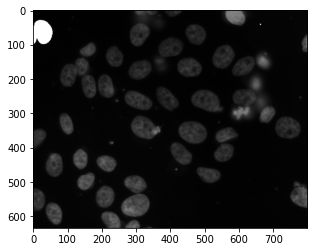

In [16]:
idxCell = (ILabel == 6)
print(idxCell.shape)
area_size = np.sum(idxCell)
print(area_size)

plt.imshow(ILabel, cmap='gray')

I[idxCell] = 255
plt.imshow(I, cmap='gray')

# 3.a Compute the area sizes of all the cells
# hint: use for loop and save the results into a list or a numpy array

# 3.b Find the cell with the largest area size in the image
# Change the intensities of that cell to 128
